# Grape V1 Multiple Station Time Series Show Solar Flare Impacts
The purpose of this notebook is to provide a one-stop shop for plotting data from the prototype of the Grape 1 Low-Cost Personal Space Weather Station. 

This notebook was created by Nathaniel Frissell W2NAF and Kristina Collins KD8OXT. Code was contributed by Aidan Montare KB3UMD, Bob Benedict KD8CGH. Hardware designed by John Gibbons. Node maintainers are listed in the `nodelist.csv` file which accompanies this notebook.

## Instructions:
Data is permanently stored at [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6622112.svg)](https://doi.org/10.5281/zenodo.6622112). To use this notebook, download the data from the repository and unzip it into the `data/` directory.

In [36]:
# pip install hamsci_psws

# Install from https://github.com/HamSCI/hamsci_psws

In [37]:
import datetime
import pytz

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from hamsci_psws import grape1

In [38]:
mpl.rcParams['font.size']        = 18
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.grid']        = True
mpl.rcParams['grid.linestyle']   = ':'
mpl.rcParams['figure.figsize']   = np.array([15, 8])
mpl.rcParams['axes.xmargin']     = 0

In [39]:
freq            = 10e6 # MHz
sTime           = datetime.datetime(2021,10,28,0, tzinfo=pytz.UTC)
eTime           = datetime.datetime(2021,10,29,0, tzinfo=pytz.UTC)

inventory       = grape1.DataInventory()
inventory.filter(freq=freq,sTime=sTime,eTime=eTime)
grape_nodes     = grape1.GrapeNodes(logged_nodes=inventory.logged_nodes)
inventory.logged_nodes

[7, 8, 9, 10, 13, 14, 15, 29, 34, 36]

In [40]:
node_nrs        = inventory.get_nodes()
gds = []
for node in node_nrs:
    
    # Skip nodes 9 and 10 because they were not working correctly during the 28 Oct 2021 Solar Flare event.
    # if node in [9,10]:
    #     continue
    
    print('================================================================================')
    print('Loading Node {!s}'.format(node))
    gd = grape1.Grape1Data(node,freq,sTime,eTime,inventory=inventory,grape_nodes=grape_nodes)
    gd.process_data()
    gds.append(gd)
    print()

mp          = grape1.GrapeMultiplot(gds)

Loading Node 7


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84375 […

  Solar Time Computation Time: 0:00:03.509564
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.125737
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.532547
dB Conversion
  dB Conversion Time: 0:00:00.002503
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.061517

Total Processing Time: 0:00:07.232845

Loading Node 8


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84375 […

  Solar Time Computation Time: 0:00:02.997252
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.076369
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.342805
dB Conversion
  dB Conversion Time: 0:00:00.003367
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.025306

Total Processing Time: 0:00:06.446176

Loading Node 9


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84363 […

  Solar Time Computation Time: 0:00:03.055636
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.085777
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.388625
dB Conversion
  dB Conversion Time: 0:00:00.003774
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.032953

Total Processing Time: 0:00:06.567459

Loading Node 10


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84364 […

  Solar Time Computation Time: 0:00:02.889540
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.100693
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86397 […

  Solar Time Computation Time: 0:00:03.266042
dB Conversion
  dB Conversion Time: 0:00:00.003125
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.025931

Total Processing Time: 0:00:06.287046

Loading Node 13


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84375 […

  Solar Time Computation Time: 0:00:03.108140
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.076460
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.192417
dB Conversion
  dB Conversion Time: 0:00:00.003298
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.025614

Total Processing Time: 0:00:06.406592

Loading Node 14


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84374 […

  Solar Time Computation Time: 0:00:03.023142
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.072526
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.245471
dB Conversion
  dB Conversion Time: 0:00:00.003703
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.028789

Total Processing Time: 0:00:06.374476

Loading Node 15


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/79950 […

  Solar Time Computation Time: 0:00:02.833652
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.070422
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.278179
dB Conversion
  dB Conversion Time: 0:00:00.002378
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.028280

Total Processing Time: 0:00:06.214922

Loading Node 34


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84375 […

  Solar Time Computation Time: 0:00:03.165451
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.072726
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.560207
dB Conversion
  dB Conversion Time: 0:00:00.002568
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.030345

Total Processing Time: 0:00:06.832262

Loading Node 36


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/84375 […

  Solar Time Computation Time: 0:00:02.936852
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.061564
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/86400 […

  Solar Time Computation Time: 0:00:03.127874
dB Conversion
  dB Conversion Time: 0:00:00.002085
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.031850

Total Processing Time: 0:00:06.161149

Loading Node 29


Loading Raw Data:   0%|                                                                                | 0/1 […

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                              | 0/83664 […

  Solar Time Computation Time: 0:00:03.410328
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.075835
Computing Solar Local Time on resampled...


  0%|                                                                                              | 0/85672 […

  Solar Time Computation Time: 0:00:03.675693
dB Conversion
  dB Conversion Time: 0:00:00.003141
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.030205

Total Processing Time: 0:00:07.195910



INFO:root:Using locally cached files for 2021 Oct 28 - 2021 Oct 29.


UnboundLocalError: local variable 'xx_xtrm' referenced before assignment

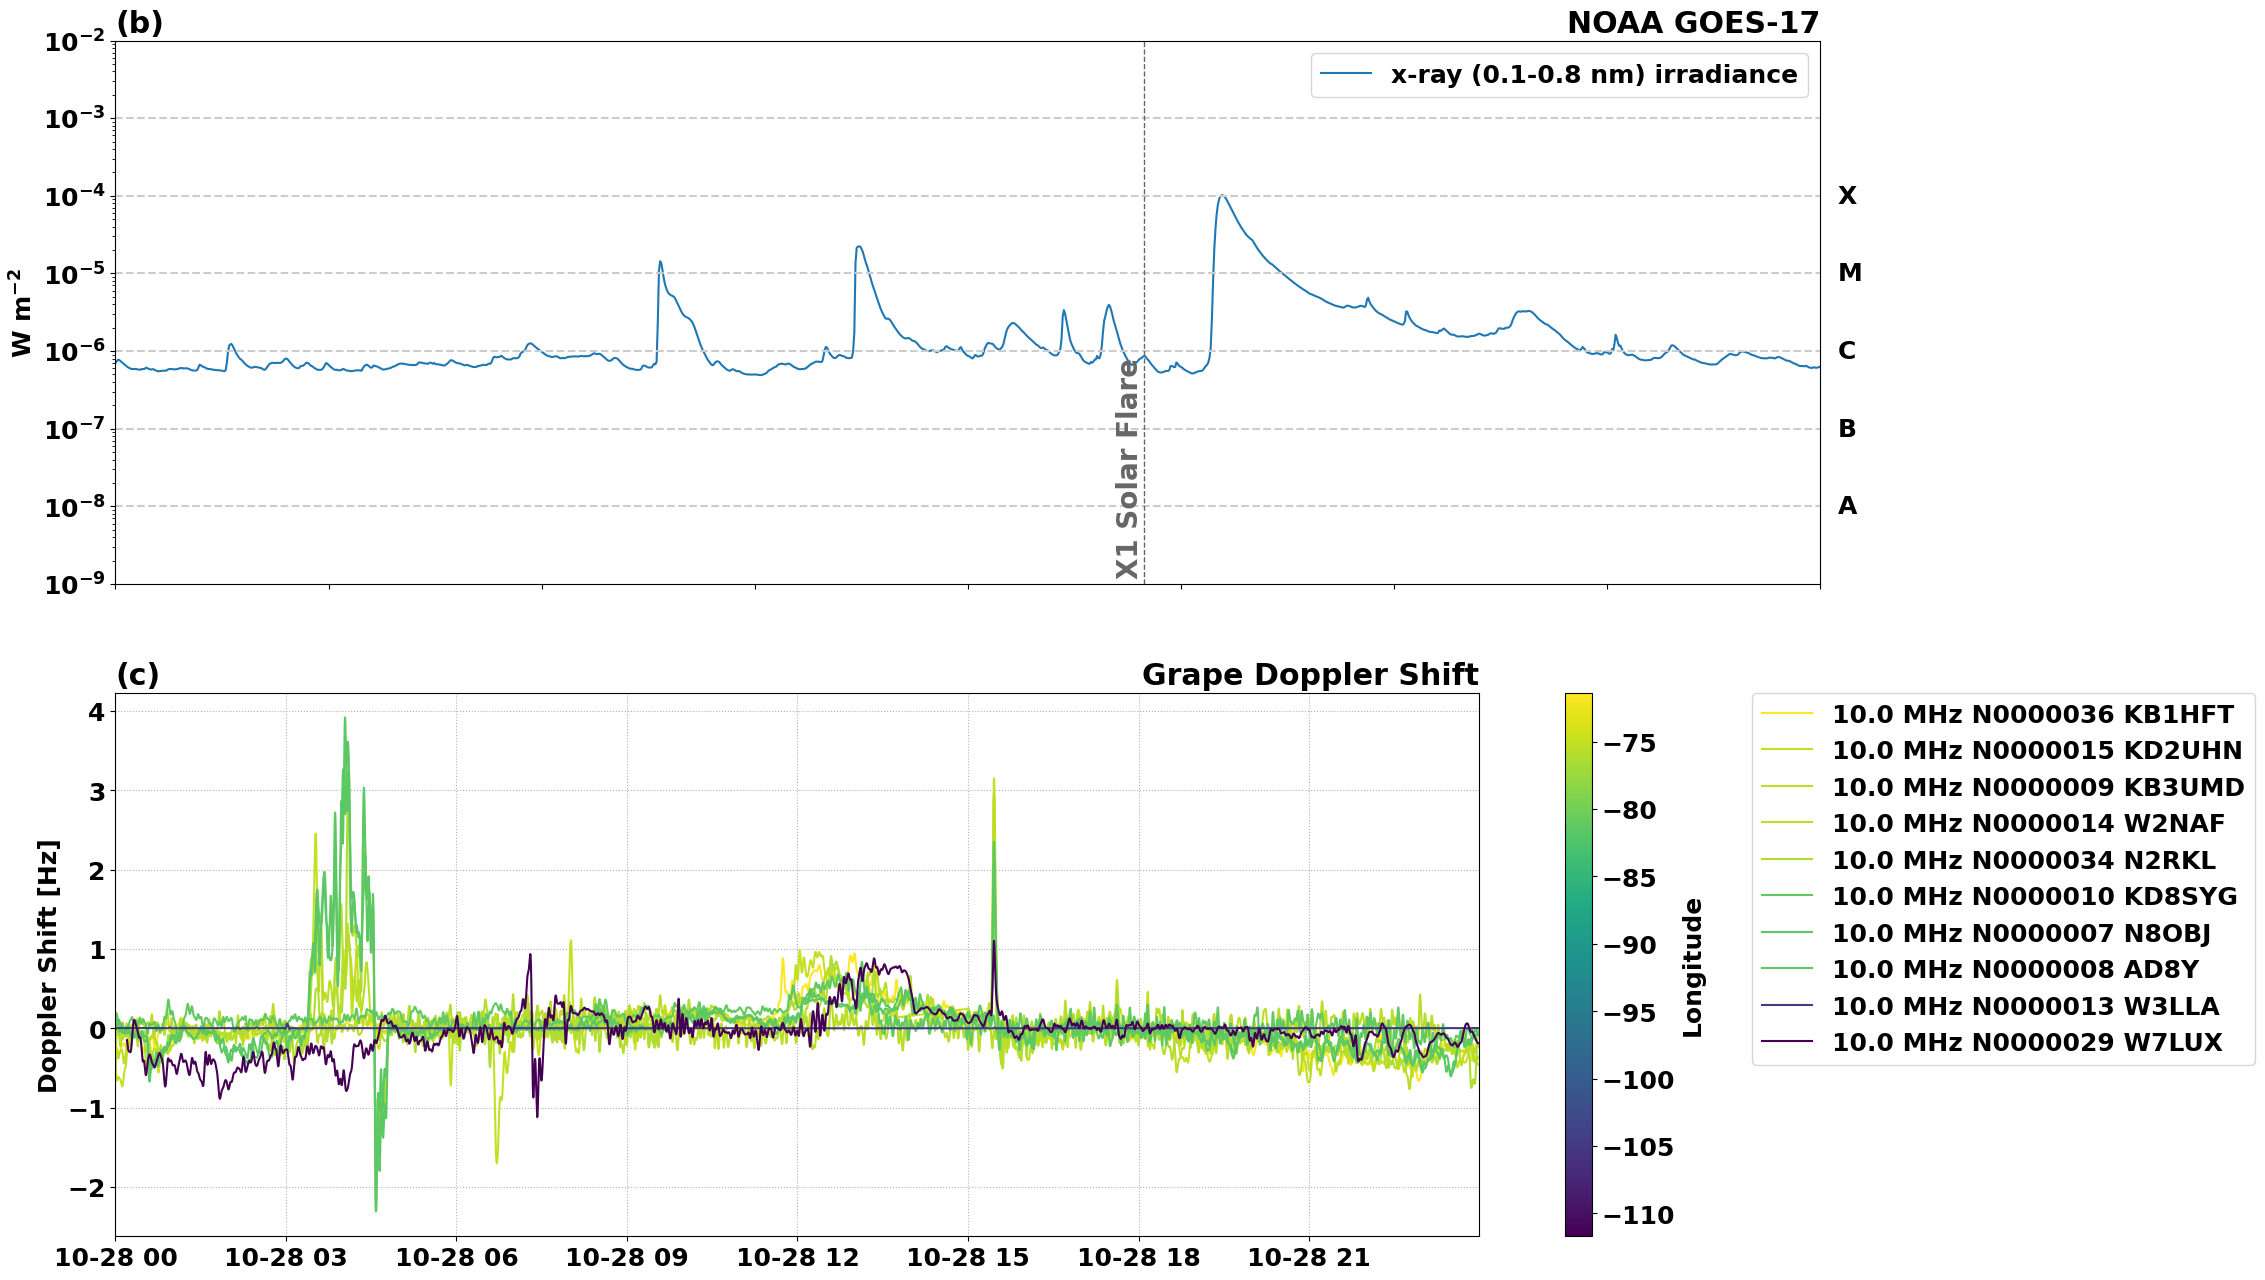

In [41]:
# WWV Coordinates
solar_lat   =   40.6683
solar_lon   = -105.0384

color_dct   = {'ckey':'lon'}
xkey        = 'UTC'
events      = [{'datetime':datetime.datetime(2021,10,28,14,29),'label':'X1 Solar Flare'}]
mp.multiplot('filtered',sTime = sTime, eTime=eTime, color_dct=color_dct,xkey=xkey,solar_lat=solar_lat,solar_lon=solar_lon,events=events,plot_GOES=True)
plt.show()